# **Climate Change Analysis using Grided Rainfall Dataset from Regional Climate Model (RegCM) Output over Indonesia** 
---

> Author : Jassica Listyarini 

> Email : listyichi@gmail.com



This notebook contains some codes example for data analysis and visualization using monthly rainfall dataset.  

***About the raw data:***

* The data used in this tutorial is one of the primary datasets in Indonesia's Third National Communication* (TNC) under the United Nations Framework Convention on Climate Change/UNFCC project (for more information, please refer to this submitted report:  https://unfccc.int/documents/79693). The gridded data were interpolated from 20km x 20km to 5km x 5km grid box. This code is just for an example to provide climate change analysis over Indonesia. Downscaling or bias-correction process is necessarily needed in order to obtain high-resolution and more reliable information for local level.  

* We will be focusing on one model output. The analysis period includes 1981 to 2005 for the baseline period and 2006 to 2099 for the future period under RCP4.5 and RCP8.5 climate scenarios.


***Basic information related to Google Colab for running the code:***

* To run a cell code, click the play button on the left side of the cell or press Shift + Enter
* To restart the analysis, restart the runtime from the top menu to clean the variables and RAM or go to Runtime-> Manage sessions-> TERMINATE in order to completely start over the analysis
* This is an interactive notebook provided by Google. If you let the page stays idle for several minutes, the runtime may be terminated automatically, and you'll need to connect it again.
* Once you open this notebook, you will be connected to Python 3 Google Compute Engine backend. Google Colab provides you with about 12GB RAM and 107GB free temporary disk space. Any data or output (i.e maps, graphs) is by default saved temporarily in this terminal. Therefore, if the runtime is terminated, you'll lose that data.

### --- Step 1: First of all, you need to add a shortcut to your GDrive the data directory shared by the author. Then, you can connect this notebook to that data. Here's how to connect to your google drive:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### --- Step 2: Ensure access to the directory containing all data and programming code

In [2]:
shppath = "/content/drive/MyDrive/ClimateChangeProjection_ColabProject/shapefiles_indokab/"
ncfiles = "/content/drive/MyDrive/ClimateChangeProjection_ColabProject/regridded_TNC/"

### --- Step 3: Installing some necessary modules to read and process the netCDF data. This process takes several minutes.


In [3]:
!pip install -r  /content/drive/MyDrive/ClimateChangeProjection_ColabProject/requirements.txt >& tmp

In [4]:
import xarray as xr
import numpy as np
import geopandas as gpd
import pandas as pd
import warnings; warnings.filterwarnings(action='ignore')
from shapely.geometry import mapping
import rioxarray  
import rasterio as rio
import matplotlib.pyplot as plt
%matplotlib inline

### --- Step 4: Define the study area (*area of interest*) and climate parameter

In [11]:
# Define your aoi, and climate variable
# The area of interest is about to cover regencies area over Indonesia
# ------------------------------------------------------------------------------

area = 'kab' # this is the abbreviation for Kabupaten or Regency
aoi = 'Pekalongan' # with capital on the first letter
var = 'rainfall'

### --- Step 5: Data processing and plotting

### --- Read shapefiles data based on each island (Sumatera, Java, Sulawesi, Kalimantan and Papua)


> pulau_sumatera.shp

> pulau_jawa.shp

> pulau_kalimantan.shp

> pulau_sulawesi.shp

> pulau_bali_nusatenggara.shp

> pulau_maluku.shp

> pulau_papua.shp

Here are coordinates boundaries of the region:
  -7.244427953000037 109.48342894400001 -6.84054763800001 109.79911318100002


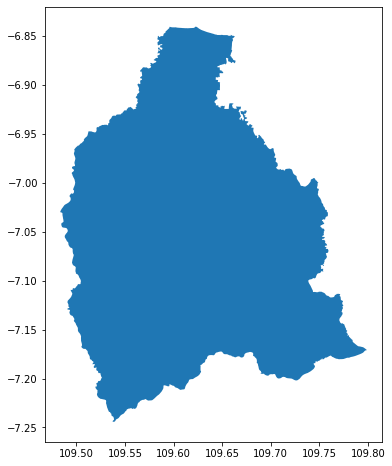

In [6]:
# Read the shapefile by adding the name of the island
shapefile = gpd.read_file(shppath+'pulau_jawa.shp') 

# retrieve the lat & lon boundary from the shapefile
polygon = shapefile[shapefile.WADMKK==aoi]
aoi_coords = polygon.bounds.reset_index(drop=True)
min_lat, max_lat = aoi_coords.miny[0], aoi_coords.maxy[0]
min_lon, max_lon = aoi_coords.minx[0], aoi_coords.maxx[0]
print("Here are coordinates boundaries of the region:\n ", min_lat, min_lon, max_lat, max_lon)
fig, ax = plt.subplots(figsize=(12,8))
polygon.plot(ax=ax, column = 'WADMKK')

### --- Read monthly rainfall dataset in netCDF format

In [7]:
# Define a function to read in the data
def read_data(dirin, var, period):
    with xr.open_dataset(ncfiles+'monthly_'+var+'_ina_regrid_'+period+'.nc') as ds:
        print(ds.keys())
        ds.rio.write_crs("epsg:4326", inplace=True)
    return ds

nc = read_data(ncfiles,'rainfall', 'baseline') # baseline period
nc45 = read_data(ncfiles,'rainfall', 'rcp45') # rcp 45 
nc85 = read_data(ncfiles,'rainfall', 'rcp85' ) # rcp 85

# Define new latitude and longitude boundery for the desired extent
min_lon = min_lon-0.2
min_lat = min_lat-0.2
max_lon = max_lon+0.2
max_lat = max_lat+0.2

cropped_nc = nc.sel(lat=slice(min_lat,max_lat), lon=slice(min_lon,max_lon))
cropped_nc45 = nc45.sel(lat=slice(min_lat,max_lat), lon=slice(min_lon,max_lon))
cropped_nc85 = nc85.sel(lat=slice(min_lat,max_lat), lon=slice(min_lon,max_lon))

# clipping netCDF file by shapefile
clipped = cropped_nc.rio.clip(shapefile[shapefile.NAMOBJ==aoi].geometry.apply(mapping), 
                              shapefile[shapefile.NAMOBJ==aoi].crs, drop=True)
clipped_45 = cropped_nc45.rio.clip(shapefile[shapefile.NAMOBJ==aoi].geometry.apply(mapping), 
                                   shapefile[shapefile.NAMOBJ==aoi].crs, drop=True)
clipped_85 = cropped_nc85.rio.clip(shapefile[shapefile.NAMOBJ==aoi].geometry.apply(mapping), 
                                   shapefile[shapefile.NAMOBJ==aoi].crs, drop=True)

KeysView(<xarray.Dataset>
Dimensions:  (NTIME: 300, lon: 1001, lat: 380)
Coordinates:
  * NTIME    (NTIME) object 1981-01-16 00:00:00 ... 2005-12-16 00:00:00
  * lon      (lon) float64 93.0 93.05 93.1 93.15 ... 142.8 142.9 142.9 143.0
  * lat      (lat) float64 -12.0 -11.95 -11.9 -11.85 -11.8 ... 6.8 6.85 6.9 6.95
Data variables:
    PRE      (NTIME, lat, lon) float64 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Fri Jul 01 23:16:12 2022: cdo remapbil,gridref.txt Combined...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...)
KeysView(<xarray.Dataset>
Dimensions:  (NTIME: 1128, lon: 1001, lat: 380)
Coordinates:
  * NTIME    (NTIME) object 2006-01-16 00:00:00 ... 2099-12-16 00:00:00
  * lon      (lon) float64 93.0 93.05 93.1 93.15 ... 142.8 142.9 142.9 143.0
  * lat      (lat) float64 -12.0 -11.95 -11.9 -11.85 -11.8 ... 6.8 6.85 6.9 6.95
Data variables:
    PRE    

### --- Calculate average monthly variations of rainfall based on the AOI for baseline period and future projection under RCP4.5 and RCP8.5 climate scenarios

> 

In [8]:
# tell xarray to calculate the mean on the entire raster (areal average)
clipped_monthly_aave = clipped.groupby("NTIME.month").mean(["lat", "lon"])
clipped_45_monthly_aave = clipped_45.groupby("NTIME.month").mean(["lat", "lon"])
clipped_85_monthly_aave = clipped_85.groupby("NTIME.month").mean(["lat", "lon"])

# Convert the data to pandas dataframe
df = clipped_monthly_aave.to_dataframe()
df45 = clipped_45_monthly_aave.to_dataframe()
df85 = clipped_85_monthly_aave.to_dataframe()

# For ease of use, let's add an additional columns to our dataframe with month
df['month'] = df.index.month
df45['month'] = df45.index.month
df85['month'] = df85.index.month

#select data for near (2025-2049), mid (2050-2074) and far (2075-2099) future.
df45_near = df45.iloc[228:528,1:3] # the selection based on rows index (Location-based Indexing)
df45_mid = df45.iloc[528:828,1:3]
df45_far = df45.iloc[828:1128,1:3]

df85_near = df85.iloc[228:528,1:3] 
df85_mid = df85.iloc[528:828,1:3]
df85_far = df85.iloc[828:1128,1:3]

# calculate monthly climatology for both period (historical and projection)
mclim = df.groupby(df['month']).mean()
mclim = mclim.iloc[:,1:2]

mclim45_near = df45_near.groupby(df45_near['month']).mean()
mclim45_mid = df45_mid.groupby(df45_mid['month']).mean()
mclim45_far = df45_far.groupby(df45_far['month']).mean()

mclim85_near = df85_near.groupby(df85_near['month']).mean() 
mclim85_mid = df85_mid.groupby(df85_mid['month']).mean()
mclim85_far = df85_far.groupby(df85_far['month']).mean()

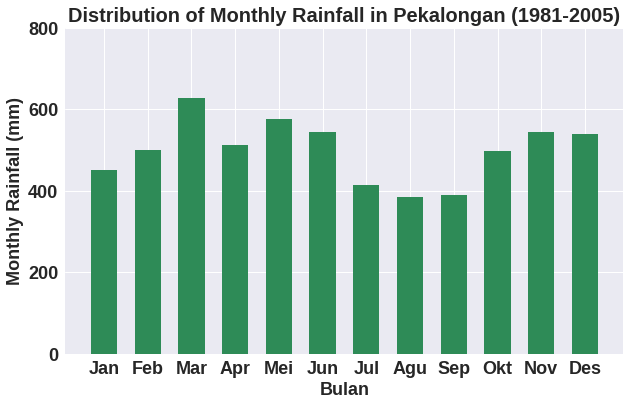

In [15]:
from matplotlib.offsetbox import AnchoredText

# Plot the data
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(10, 6))

X = ['Jan','Feb','Mar','Apr','Mei','Jun','Jul','Agu','Sep','Okt','Nov','Des']
Y = np.arange(0, mclim.PRE.max()+300, 200) #(0, mclim.PRE.max()+300, 100)
X_axis = np.arange(len(X))
Y_axis = np.arange(len(Y))

#mclim_to_plot = mclim['PRE'].to_list()
bar_width = 0.6
unit = 'mm'
plt.bar(X_axis, mclim['PRE'].to_list(), bar_width, color='seagreen')

plt.xticks(X_axis, X, fontsize=18, fontweight='bold')
plt.yticks(Y, fontsize=18, fontweight='bold')
plt.xlabel('Bulan', fontweight='bold', fontsize=18)
plt.ylabel('Monthly {} ({})'.format(var.capitalize(),unit), fontweight='bold', fontsize=18)
plt.title("Distribution of Monthly {} in {} (1981-2005)".format(var.capitalize(),
                                                       #area.capitalize(), 
                                                       aoi), fontsize=20, 
          fontweight='bold')
plt.show() 

### --- Calculate the change of rainfall (in percent) relative to the baseline period

In [16]:
# define a function to calculate change of the projection monthly climatology relative to baseline period
def perc_change( hist, proj):
    changes_in_percent = (proj - hist)/hist * 100
    return changes_in_percent

# Calculate percentage change for RCP4.5 scenario
percent_change45_near = perc_change(mclim, mclim45_near)
percent_change45_mid = perc_change(mclim, mclim45_mid)
percent_change45_far = perc_change(mclim, mclim45_far)
percent_change45_far

# Calculate percentage change for RCP8.5 scenario
percent_change85_near = perc_change(mclim, mclim85_near)
percent_change85_mid = perc_change(mclim, mclim85_mid)
percent_change85_far = perc_change(mclim, mclim85_far)

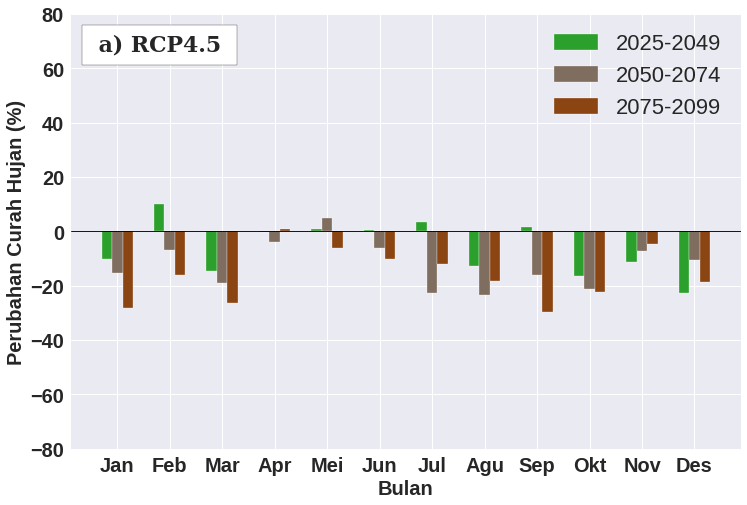

In [17]:
# define the scenario to be shown, RCP4.5
scenario = 'RCP4.5'

# set data to plot
data1 = percent_change45_near['PRE'].to_list()
data2 = percent_change45_mid['PRE'].to_list()
data3 = percent_change45_far['PRE'].to_list()

# set width of bars
bar_width = 0.2

# Set position of bar on X axis
r1 = np.arange(len(data1))
r2 = [x + bar_width for x in r1]
r3 = [x + 2*bar_width for x in r1]

# Make the plot
fig, ax = plt.subplots(figsize=(12, 8))
plt.style.use('seaborn')
plt.bar(r1, data1, color='tab:green', width=bar_width, edgecolor='white', label='2025-2049', alpha =1.0)
plt.bar(r2, data2, color='#7f6d5f', width=bar_width, edgecolor='white', label='2050-2074', alpha =1.0)
plt.bar(r3, data3, color='saddlebrown', width=bar_width, edgecolor='white', label='2075-2099', alpha =1.0)

# line colour is black
plt.axhline(y = 0, color = 'black', linewidth = 0.9)

# Set ticks for x and y
X = ['Jan','Feb','Mar','Apr','Mei','Jun','Jul','Agu','Sep','Okt','Nov','Des']
Y = [-80, -60, -40, -20,   0,  20, 40, 60, 80]


plt.xticks([r + bar_width for r in range(len(data1))], X, fontsize=20, fontweight='bold')
plt.yticks(Y, fontsize=20, fontweight='bold')
plt.xlabel('Bulan', fontsize=20, fontweight='bold')
plt.ylabel('Perubahan Curah Hujan (%)', fontsize=20, fontweight='bold')
#plt.title("Proyeksi perubahan curah hujan Kabupaten Boyolali", fontsize=20)

at = AnchoredText(
    " a) RCP4.5 ", prop=dict(family= 'serif', size=22, weight='bold'), frameon=True, loc='upper left')
ax.add_artist(at)

# Create legend & Show graphic
plt.legend(prop=dict(family= 'sans-serif', size=22)) #  weight='bold'
#plt.title("Proyeksi perubahan {} {}. {}".format(var,area.capitalize(),aoi), fontsize=16, fontweight='bold')
plt.show()

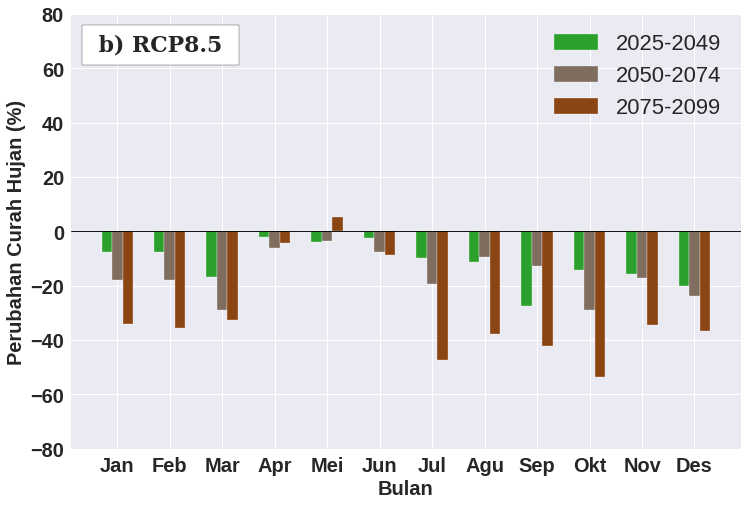

In [18]:
# define the scenario to be shown
scenario = 'RCP8.5'
# set data to plot
data1 = percent_change85_near['PRE'].to_list()
data2 = percent_change85_mid['PRE'].to_list()
data3 = percent_change85_far['PRE'].to_list()

# set width of bars
bar_width = 0.2

# Set position of bar on X axis
r1 = np.arange(len(data1))
r2 = [x + bar_width for x in r1]
r3 = [x + 2*bar_width for x in r1]

# Make the plot
fig, ax = plt.subplots(figsize=(12, 8))
plt.style.use('seaborn')
plt.bar(r1, data1, color='tab:green', width=bar_width, edgecolor='white', label='2025-2049', alpha =1.0)
plt.bar(r2, data2, color='#7f6d5f', width=bar_width, edgecolor='white', label='2050-2074', alpha =1.0)
plt.bar(r3, data3, color='saddlebrown', width=bar_width, edgecolor='white', label='2075-2099', alpha =1.0)

# line colour is black
plt.axhline(y = 0, color = 'black', linewidth = 0.9)

# Set ticks for x and y
X = ['Jan','Feb','Mar','Apr','Mei','Jun','Jul','Agu','Sep','Okt','Nov','Des']
Y = [-80, -60, -40, -20,   0,  20, 40, 60, 80]


plt.xticks([r + bar_width for r in range(len(data1))], X, fontsize=20, fontweight='bold')
plt.yticks(Y, fontsize=20, fontweight='bold')
plt.xlabel('Bulan', fontsize=20, fontweight='bold')
plt.ylabel('Perubahan Curah Hujan (%)', fontsize=20, fontweight='bold')
#plt.title("Proyeksi perubahan curah hujan Kabupaten Boyolali", fontsize=20)

at = AnchoredText(
    " b) RCP8.5 ", prop=dict(family= 'serif', size=22, weight='bold'), frameon=True, loc='upper left')
ax.add_artist(at)

# Create legend & Show graphic
plt.legend(prop=dict(family= 'sans-serif', size=22))
#plt.title("Proyeksi perubahan {} {} {}".format(var,area.capitalize(),aoi), fontsize=16, fontweight='bold')
plt.show()

### --- Trend Analysis

Linear regression is a statistical method to find a line that most approximates the target values. Basically what the linear regression algorithm does is it fits multiple lines on the data points and returns the line that results in the least error.

In [19]:
# calculate annual rainfall accumulation for each dataset
annual_rf = clipped_monthly_aave.groupby("NTIME.year").sum(["NTIME"])
annual_rf45 = clipped_45_monthly_aave.groupby("NTIME.year").sum(["NTIME"])
annual_rf85 = clipped_85_monthly_aave.groupby("NTIME.year").sum(["NTIME"])

# Combine both historical and projection dataset
annual_rf45_toplot = annual_rf.merge(annual_rf45)
annual_rf85_toplot = annual_rf.merge(annual_rf85)

<function matplotlib.pyplot.show(*args, **kw)>

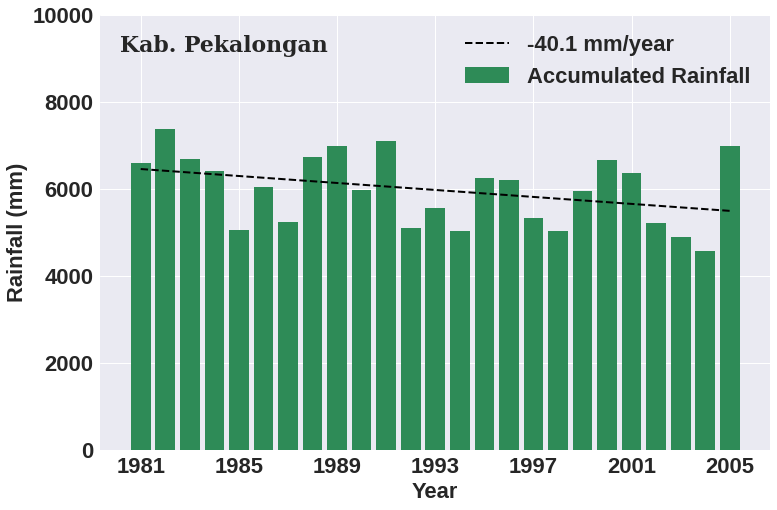

In [21]:
# Calculate linear regression for baseline period
x_basevalues = np.array(range(len(annual_rf.year.values)))
trend_baseline= np.polyfit(x_basevalues, annual_rf.PRE.values, 1) # c1 and c2 are the coefficients of regression
fit_baseline = np.poly1d(trend_baseline)  
c1,c2 = trend_baseline
#print('Here is the slope and intercept for baseline regression :', c1, c2)

fig, ax = plt.subplots(figsize=(12, 8))

plt.bar(np.arange(1981,2006,1),annual_rf['PRE'], color='seagreen', linewidth=2, label = 'Accumulated Rainfall')
plt.plot(np.arange(1981,2006,1), fit_baseline(x_basevalues), color='black', linestyle='dashed',
         linewidth=2, label= str(round(c1,1))+' mm/year')

plt.xticks(np.arange(1981, 2008, 4), fontsize=22, fontweight='bold') #np.arange(1981, 2008, 4)
plt.yticks(np.arange(0, 12000, 2000), fontsize=22, fontweight='bold')
plt.xlabel("Year", fontsize=22, fontweight='bold')
plt.ylabel("{} ({})".format(var.capitalize(), 'mm'), fontsize=22, fontweight='bold')
# plt.title("Tren {} tahunan di {}. {} \nperiode 1981-2005".format(var,area.capitalize(),aoi), 
#           fontsize=28, fontweight='bold')
plt.legend(prop=dict(family= 'sans-serif', size=22, weight='bold'))

at = AnchoredText(
    "{}. {}".format(area.capitalize(), aoi), prop=dict(family= 'serif', size=22,
                                                       weight='bold'),  frameon=False, loc='upper left')
ax.add_artist(at)
plt.show


Here is the slope and intercept for RCP8.5 scenario : -16.589303625374896 6136.226398008359
Here is the slope and intercept for RCP4.5 scenario : -9.773323397715712 6047.341136081085


<function matplotlib.pyplot.show(*args, **kw)>

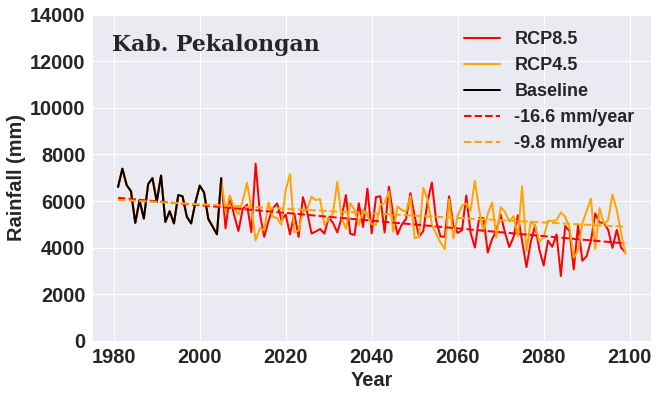

In [23]:
x_values = np.array(range(len(annual_rf45_toplot.year.values)))
trend85= np.polyfit(x_values, annual_rf85_toplot.PRE.values, 1) # a and b are the polynomial coefficients
fit85 = np.poly1d(trend85)  
a,b = trend85
print('Here is the slope and intercept for RCP8.5 scenario :', a, b)

trend45= np.polyfit(x_values, annual_rf45_toplot.PRE.values, 1) # c and d are the polynomial coeficients
fit45 = np.poly1d(trend45) 
c,d = trend45
print('Here is the slope and intercept for RCP4.5 scenario :', c, d)

# Creating timeseries plot for projection period under scenario RCP4.5 and RCP 8.5
fig, ax = plt.subplots(figsize=(10, 6))

plt.plot(np.arange(1981,2100,1), annual_rf85_toplot['PRE'], color='red', linewidth=2, label = 'RCP8.5' )
plt.plot(np.arange(1981,2100,1), annual_rf45_toplot['PRE'], color='orange', linewidth=2, label = 'RCP4.5')
plt.plot(np.arange(1981,2006,1), annual_rf['PRE'], color='black', linewidth=2, label = 'Baseline')

plt.plot(np.arange(1981,2100,1), fit85(x_values), color='red', linestyle='dashed', linewidth=2, label= str(round(a,1))+' mm/year')
plt.plot(np.arange(1981,2100,1), fit45(x_values), color='orange', linestyle='dashed', linewidth=2, label= str(round(c,1))+' mm/year')

plt.xticks(np.arange(1980, 2105, 20), fontsize=20, fontweight='bold')
plt.yticks(np.arange(0, 15000, 2000), fontsize=20, fontweight='bold')
plt.xlabel("Year", fontsize=20, fontweight='bold')
plt.ylabel("{} ({})".format(var.capitalize(), 'mm'), fontsize=20, fontweight='bold')

at = AnchoredText(
    "{}. {}".format(area.capitalize(), aoi), prop=dict(family= 'serif', size=22,
                                                       weight='bold'),  frameon=False, loc='upper left')
ax.add_artist(at)
#plt.title("Proyeksi tren total {} tahunan \n{}. {}".format(var, area.capitalize(),aoi), fontsize=28, fontweight='bold')
plt.legend(prop=dict(family= 'sans-serif', size=18, weight='bold'))
plt.show

### --- Spatial distributin | Calculate change of rainfall (in %) for three future projection period relative to the baseline period

In [24]:
# calculate annual rainfall 
annual_nc= cropped_nc.groupby("NTIME.year").sum().sel(lat=slice(min_lat+0.15,max_lat-0.15), lon=slice(min_lon+0.15,max_lon-0.15))
annual_nc45= cropped_nc45.groupby("NTIME.year").sum().sel(lat=slice(min_lat+0.15,max_lat-0.15), lon=slice(min_lon+0.15,max_lon-0.15))
annual_nc85= cropped_nc85.groupby("NTIME.year").sum().sel(lat=slice(min_lat+0.15,max_lat-0.15), lon=slice(min_lon+0.15,max_lon-0.15))

# select data for near (2025-2049), mid (2050-2074) and far (2075-2099) future.
annual_nc45_near = annual_nc45.isel(year=slice(19,44))
annual_nc45_mid = annual_nc45.isel(year=slice(44,69))
annual_nc45_far = annual_nc45.isel(year=slice(69,94))

annual_nc85_near = annual_nc85.isel(year=slice(19,44))
annual_nc85_mid = annual_nc85.isel(year=slice(44,69))
annual_nc85_far = annual_nc85.isel(year=slice(69,94))

# Calculate percentage change of future dataset relative to historical period
def percent_change(base,rcp):
  base_mean = base.mean(dim='year')
  rcp_mean = rcp.mean(dim='year')
  changes = (rcp_mean-base_mean)/base_mean*100
  return changes

rf45_near_change = percent_change(annual_nc,annual_nc45_near)
rf45_mid_change = percent_change(annual_nc,annual_nc45_mid)
rf45_far_change = percent_change(annual_nc,annual_nc45_far)

rf85_near_change = percent_change(annual_nc,annual_nc85_near)
rf85_mid_change = percent_change(annual_nc,annual_nc85_mid)
rf85_far_change = percent_change(annual_nc,annual_nc85_far)

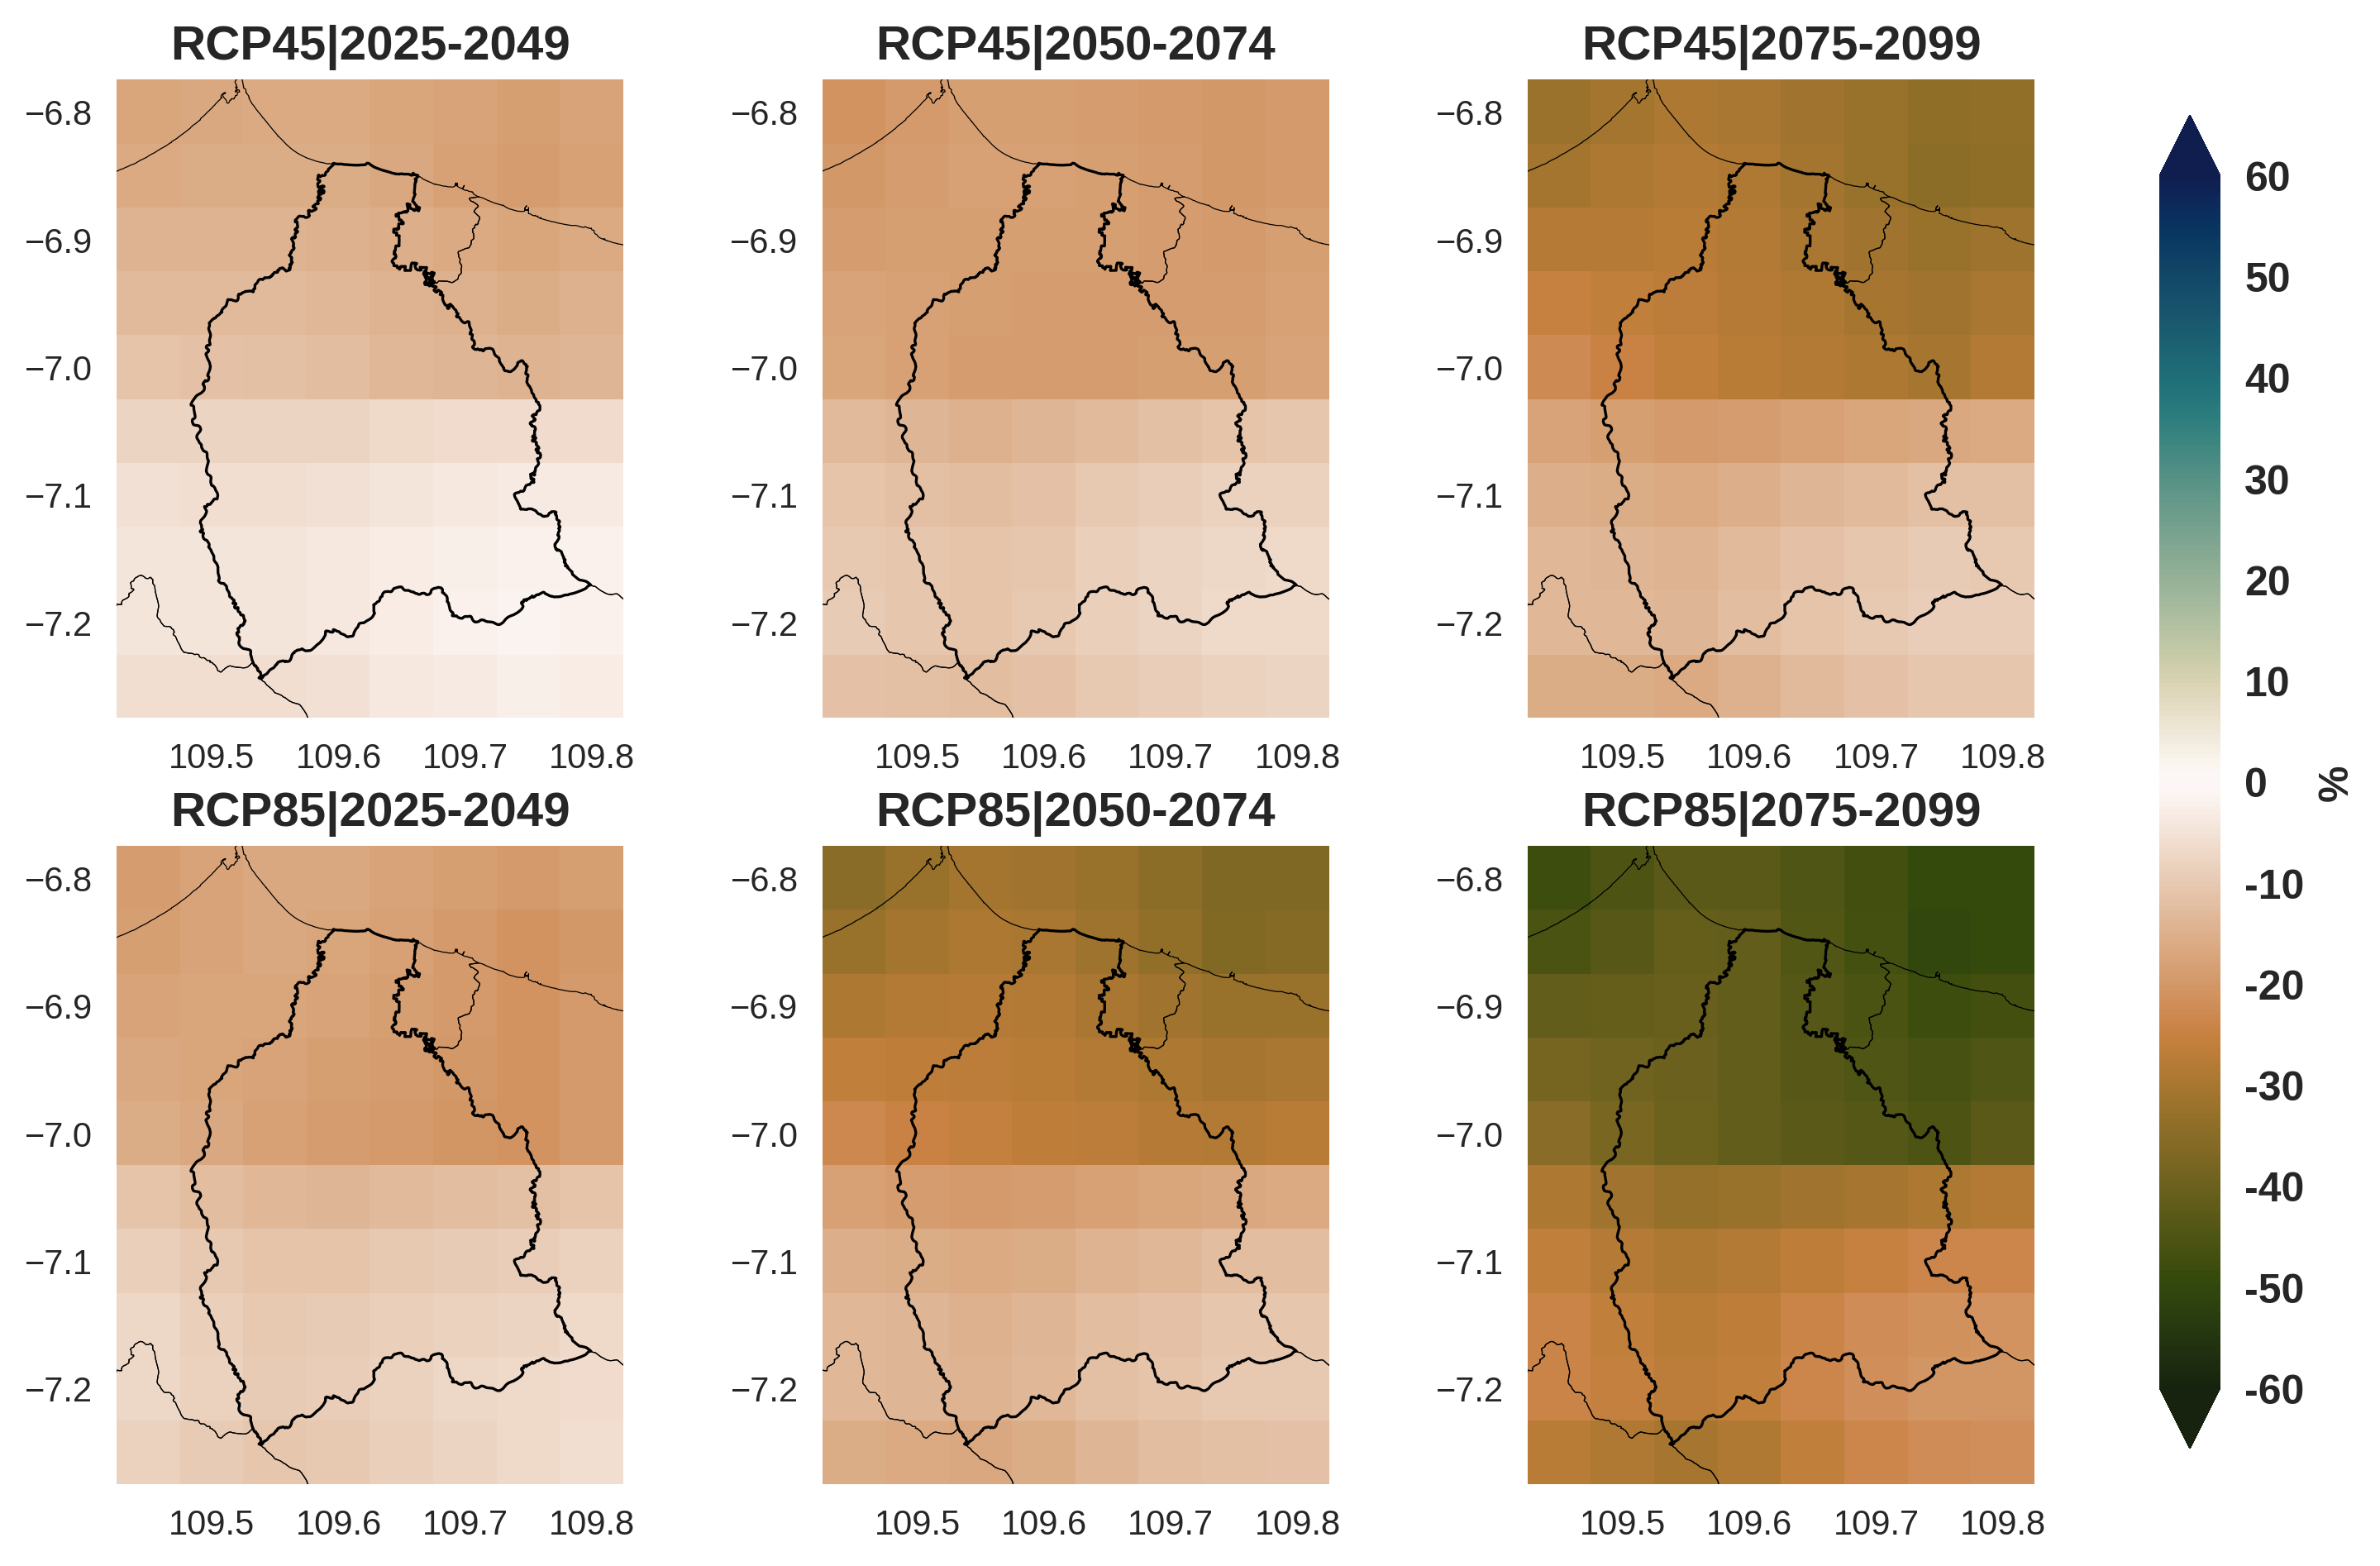

In [25]:
from matplotlib import cm
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import cmocean

min_colorbar = -60
max_colorbar = 60
bar_ticks = np.arange(min_colorbar, max_colorbar+10, 10)
my_colormap = cmocean.cm.tarn

metadata_shp = 'TASWIL2500020210531_DATA_BATAS_KABKOTA'
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(13,7.5), dpi=300)

rf45_near_change['PRE'].plot.pcolormesh(ax=axes[0,0],
            vmin=min_colorbar,
            vmax=max_colorbar,
            cmap=my_colormap,
            add_colorbar=False,
            extend="both",)
axes[0,0].set_title('RCP45|2025-2049', fontsize=14, fontweight='bold')
axes[0,0].set_ylabel('')
axes[0,0].set_xlabel('')
shapefile[shapefile.METADATA==metadata_shp].plot(ax=axes[0,0], edgecolor='black', linewidth=0.3, facecolor="none")
polygon[polygon.WADMKK==aoi].plot(ax=axes[0,0], edgecolor='black', linewidth=0.8, facecolor="none")
rf45_mid_change['PRE'].plot.pcolormesh(ax=axes[0,1],
            vmin=min_colorbar,
            vmax=max_colorbar,
            cmap=my_colormap,
            add_colorbar=False,
            extend="both",)
axes[0,1].set_title('RCP45|2050-2074', fontsize=14, fontweight='bold')
axes[0,1].set_ylabel('')
axes[0,1].set_xlabel('')
shapefile[shapefile.METADATA==metadata_shp].plot(ax=axes[0,1], edgecolor='black', linewidth=0.3, facecolor="none")
polygon[polygon.WADMKK==aoi].plot(ax=axes[0,1], edgecolor='black', linewidth=0.8, facecolor="none")
rf45_far_change['PRE'].plot.pcolormesh(ax=axes[0,2],
            vmin=min_colorbar,
            vmax=max_colorbar,
            cmap=my_colormap,
            add_colorbar=False,
            extend="both",)
axes[0,2].set_title('RCP45|2075-2099', fontsize=14, fontweight='bold')
axes[0,2].set_ylabel('')
axes[0,2].set_xlabel('')
shapefile[shapefile.METADATA==metadata_shp].plot(ax=axes[0,2], edgecolor='black', linewidth=0.3, facecolor="none")
polygon[polygon.WADMKK==aoi].plot(ax=axes[0,2], edgecolor='black', linewidth=0.8, facecolor="none")
rf85_near_change['PRE'].plot.pcolormesh(ax=axes[1,0],
            vmin=min_colorbar,
            vmax=max_colorbar,
            cmap=my_colormap,
            add_colorbar=False,
            extend="both",)
axes[1,0].set_title('RCP85|2025-2049', fontsize=14, fontweight='bold')
axes[1,0].set_ylabel('')
axes[1,0].set_xlabel('')
shapefile[shapefile.METADATA==metadata_shp].plot(ax=axes[1,0], edgecolor='black', linewidth=0.3, facecolor="none")
polygon[polygon.WADMKK==aoi].plot(ax=axes[1,0], edgecolor='black', linewidth=0.8, facecolor="none")
rf85_mid_change['PRE'].plot.pcolormesh(ax=axes[1,1],
            vmin=min_colorbar,
            vmax=max_colorbar,
            cmap=my_colormap,
            add_colorbar=False,
            extend="both",)
axes[1,1].set_title('RCP85|2050-2074', fontsize=14, fontweight='bold')
axes[1,1].set_ylabel('')
axes[1,1].set_xlabel('')
shapefile[shapefile.METADATA==metadata_shp].plot(ax=axes[1,1], edgecolor='black', linewidth=0.3, facecolor="none")
polygon[polygon.WADMKK==aoi].plot(ax=axes[1,1], edgecolor='black', linewidth=0.8, facecolor="none")
rf85_far_change['PRE'].plot.pcolormesh(ax=axes[1,2],
            vmin=min_colorbar,
            vmax=max_colorbar,
            cmap=my_colormap,
            add_colorbar=False,
            extend="both",)
axes[1,2].set_title('RCP85|2075-2099', fontsize=14, fontweight='bold')
axes[1,2].set_ylabel('')
axes[1,2].set_xlabel('')
shapefile[shapefile.METADATA==metadata_shp].plot(ax=axes[1,2], edgecolor='black', linewidth=0.3, facecolor="none")
polygon[polygon.WADMKK==aoi].plot(ax=axes[1,2], edgecolor='black', linewidth=0.8, facecolor="none")
norm = mpl.colors.Normalize(vmin=min_colorbar, vmax=max_colorbar)
cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=my_colormap), ax=axes, ticks= bar_ticks,
                    orientation='vertical', extend='both', pad=0.05, shrink=0.95)  
cbar.ax.set_yticklabels(labels=bar_ticks, fontsize=12, fontweight='bold')
cbar.set_label('%', fontsize=12, fontweight='bold')  # loc='center'
plt.show()   